<a href="https://colab.research.google.com/github/alexngocvu/Personal-Project/blob/main/CRISP_DM_Case_Study___Online_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your CSV file (e.g., 'Online Sales Data.csv').
Ensure the file name matches exactly in the next step.


Saving Online Sales Data.csv to Online Sales Data (3).csv

Uploaded files: ['Online Sales Data (3).csv']
Successfully loaded Online Sales Data.csv


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

 Credit Card       1.00      1.00      1.00        28
  Debit Card       1.00      1.00      1.00         8
      PayPal       1.00      1.00      1.00        12

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Confusion Matrix:
              Credit Card  PayPal  Debit Card
Credit Card           28       0           0
PayPal                 0      12           0
Debit Card             0       0           8


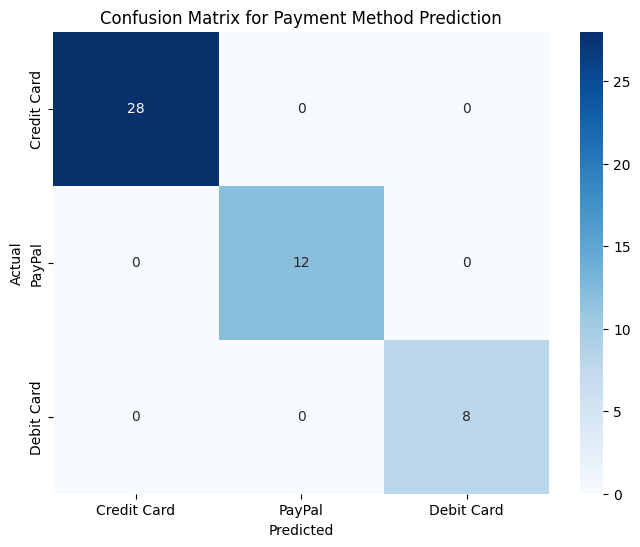


Feature Coefficients (Impact on Payment Method):
              Units Sold  Unit Price  Total Revenue     Month  \
Credit Card    0.312045    0.004806       -0.00185  0.004397   
PayPal         0.432535   -0.005012        0.00189  0.019337   
Debit Card    -0.744580    0.000205       -0.00004 -0.023734   

             Product Category_Books  Product Category_Clothing  \
Credit Card                0.750545                  -1.493599   
PayPal                    -0.458986                   2.240300   
Debit Card                -0.291559                  -0.746701   

             Product Category_Electronics  Product Category_Home Appliances  \
Credit Card                      0.642249                         -0.496934   
PayPal                          -0.290058                         -0.241042   
Debit Card                      -0.352190                          0.737976   

             Product Category_Sports  Region_Europe  Region_North America  
Credit Card                 1.6840

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

# Step 1: Upload the .csv file
print("Please upload your CSV file (e.g., 'Online Sales Data.csv').")
print("Ensure the file name matches exactly in the next step.")
uploaded = files.upload()

# Print uploaded file names to confirm
print("\nUploaded files:", list(uploaded.keys()))

# Step 2: Load the CSV file
file_name = "Online Sales Data.csv"  # Update if your file name differs
try:
    df = pd.read_csv(file_name)
    print(f"Successfully loaded {file_name}")
except FileNotFoundError:
    print(f"Error: '{file_name}' not found. Check the uploaded file name and update 'file_name' variable.")
    print("Uploaded files:", list(uploaded.keys()))
    raise
except Exception as e:
    print(f"Error loading file: {e}")
    raise

# Step 3: Preprocess the data
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df_encoded = pd.get_dummies(df, columns=["Product Category", "Region"], drop_first=True)
X = df_encoded.drop(["Transaction ID", "Date", "Product Name", "Payment Method"], axis=1)
y = df["Payment Method"]

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Logistic Regression model
model = LogisticRegression(multi_class="multinomial", max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["Credit Card", "PayPal", "Debit Card"])
cm_df = pd.DataFrame(cm, index=["Credit Card", "PayPal", "Debit Card"], columns=["Credit Card", "PayPal", "Debit Card"])
print("Confusion Matrix:\n", cm_df)

# Optional: Visualize confusion matrix in Colab
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Credit Card", "PayPal", "Debit Card"], yticklabels=["Credit Card", "PayPal", "Debit Card"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Payment Method Prediction")
plt.show()

# Step 7: Feature importance (Logistic Regression coefficients)
# Get feature names and coefficients
feature_names = X.columns
coefficients = pd.DataFrame(model.coef_, index=["Credit Card", "PayPal", "Debit Card"], columns=feature_names)
print("\nFeature Coefficients (Impact on Payment Method):\n", coefficients)

# Focus on Product Category coefficients
category_features = [col for col in feature_names if "Product Category" in col]
category_coefficients = coefficients[category_features]
print("\nProduct Category Coefficients:\n", category_coefficients)

# Step 8: Prediction summary by Product Category
# Add predictions to original test data
test_indices = X_test.index
test_df = df.loc[test_indices].copy()
test_df["Predicted Payment Method"] = y_pred

# Summarize payment method predictions by Product Category
category_payment_summary = test_df.groupby(["Product Category", "Predicted Payment Method"]).size().unstack(fill_value=0)
print("\nPredicted Payment Method Counts by Product Category:\n", category_payment_summary)

# Step 9: Export results for Google Sheets
# Export predictions
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results.to_csv("classification_predictions.csv", index=False)
files.download("classification_predictions.csv")

# Export confusion matrix
cm_df.to_csv("confusion_matrix.csv")
files.download("confusion_matrix.csv")

# Export accuracy
accuracy_df = pd.DataFrame({"Metric": ["Accuracy", "Baseline (Random Guess)"], "Value": [accuracy, 0.333]})
accuracy_df.to_csv("accuracy_results.csv", index=False)
files.download("accuracy_results.csv")

# Export feature coefficients
coefficients.to_csv("feature_coefficients.csv")
files.download("feature_coefficients.csv")

# Export Product Category payment summary
category_payment_summary.to_csv("category_payment_summary.csv")
files.download("category_payment_summary.csv")